In [11]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-31.22778878034528 -73.41726090139497
-69.44726561411231 -101.18698485951808
64.48646210853266 -39.00727460896249
-57.32306334262604 109.33383405325395
-67.44873494527022 143.48649511793957
-33.41505420095323 -51.05570526560419
-48.62661137350875 102.02857730739362
20.850610424965993 98.65044543558815
-38.856798052572465 94.54854283979228
55.56644338380562 -41.236635469222364
-57.23016070555816 -118.73057699540007
-52.6605013871817 -66.2397874883224
-69.08654881442651 -64.68272617505174
-15.045688451816261 42.49270918201316
-46.83931317038856 -14.059726594883585
41.349393935100125 156.98747636739927
85.0333076150767 92.09509617231146
-1.9227324622689252 166.2343521041177
12.986512168428149 -122.38247593061467
-70.088214918448 -113.35151110377144
-19.408263464492705 -109.10739175098661
-15.939812264315705 -137.49298683865268
64.78110866089031 168.19878649859413
-43.637548791630905 56.89300430442012
32.89063191738508 -118.31876199234244
-62.38730257782611 122.77890394787244
71.3584551585

-53.14718731895826 112.5993572611925
-64.53954116997276 100.47324098500877
72.85330956025373 101.68543946665363
-14.063344923344829 129.687026500191
-50.748003689544895 -134.1759059272327
-3.7606096475945776 -36.65291434691349
87.70851941493447 167.507133831666
-10.488831538855536 -46.893814950322025
89.40537795687109 149.26622107172727
-73.56894090333012 -143.49827481651363
-5.535934599106611 57.0282989988483
-22.833097750909417 -158.78296873363664
-15.623585702661657 57.56936630849975
68.84593450299349 157.1236880167911
-65.78273339989839 -51.81608855570434
-41.97789305497561 126.74958846245545
66.05852442686458 170.48664896320673
-86.26738966089482 -102.39754820562709
-74.5894264338649 143.6569585074584
-37.62820506184763 -164.0570617214057
-2.7763562121223657 63.74932699082862
-54.28943936557674 -124.25547856998311
34.312120335411436 28.750197401444893
-81.69007228946964 84.45979585219584
-67.87081449082805 131.42488287739292
5.129777177565657 122.10538213588268
61.64659112059229 -

-53.18998196395358 -72.84625314067839
57.17460297433317 111.5314459552153
68.92431741760552 -53.90947699793229
-85.78390681843564 1.0058109514650369
39.632982009100175 48.69049400470925
81.89651287825896 -117.32093950111535
28.200225641592226 114.36788859518629
-76.157180354848 -32.52686395642317
-21.136125511694317 -156.7725575739675
-41.65868541176613 -125.1791814413687
-27.237603223922072 3.8378112958424992
-68.13881135623484 -46.464827213876504
66.98665770181617 -25.368314180670097
23.57726464746247 -43.41119039659594
-69.49923136106935 0.17928374216680254
-59.07928918993852 48.266692623124015
-82.96775571415131 116.48473912146073
3.9384563994721162 -43.043230712014235
-57.1970620215046 120.31808862182004
-33.10678205795963 95.28549021238553
85.95078539900425 -74.00640612243438
24.554494123890407 3.0683021202398493
35.00809484313082 33.768580547497066
-50.00187050930329 145.80460270195897
-86.93755053038464 -27.799884369289316
10.874865015147407 -69.5687132224415
-49.01771644430442

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [17]:
#Import the requests library. 
import requests

#Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illapel
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mae sai
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | mocambique
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 20 of Set 1 | taolanaro
Cit

City not found. Skipping...
Processing Record 39 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 4 | iquique
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | isetskoye
Processing Record 44 of Set 4 | marfino
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | senador guiomard
Processing Record 49 of Set 4 | itarema
Processing Record 50 of Set 4 | antofagasta
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | melfort
Processing Record 3 of Set 5 | zhangzhou
Processing Record 4 of Set 5 | puerto el triunfo
Processing Record 5 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | kaeo
Processing Record 8 of Set 5 | matsanga
City not found.

Processing Record 26 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 27 of Set 8 | ocu
Processing Record 28 of Set 8 | csanytelek
Processing Record 29 of Set 8 | oriximina
Processing Record 30 of Set 8 | san patricio
Processing Record 31 of Set 8 | taonan
Processing Record 32 of Set 8 | san juan
Processing Record 33 of Set 8 | bambous virieux
Processing Record 34 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 35 of Set 8 | taber
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | kalmunai
Processing Record 38 of Set 8 | safwah
City not found. Skipping...
Processing Record 39 of Set 8 | revelstoke
Processing Record 40 of Set 8 | darnah
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | saint-pierre
Processing Record 43 of Set 8 | maceio
Processing Record 44 of Set 8 | lolua
City not found. Skipping...
Processing Record 45 of Set 8 | olavarria
Processing Record 46 of Set 8 | jinchang
Processing Re

Processing Record 14 of Set 12 | hambantota
Processing Record 15 of Set 12 | uzhur
Processing Record 16 of Set 12 | champerico
Processing Record 17 of Set 12 | karasjok
Processing Record 18 of Set 12 | bratsk
Processing Record 19 of Set 12 | nanning
Processing Record 20 of Set 12 | hofn
Processing Record 21 of Set 12 | san rafael del sur
Processing Record 22 of Set 12 | opuwo
Processing Record 23 of Set 12 | saleaula
City not found. Skipping...
Processing Record 24 of Set 12 | kokstad
Processing Record 25 of Set 12 | pouembout
Processing Record 26 of Set 12 | uvinza
Processing Record 27 of Set 12 | tarko-sale
Processing Record 28 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 29 of Set 12 | campbellsville
Processing Record 30 of Set 12 | mayna
Processing Record 31 of Set 12 | magadan
Processing Record 32 of Set 12 | marzuq
Processing Record 33 of Set 12 | puerto madero
Processing Record 34 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 35 of 

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Illapel,-31.6308,-71.1653,63.82,62,100,4.38,CL,2022-05-24 22:12:29
1,Punta Arenas,-53.1500,-70.9167,35.71,75,40,13.80,CL,2022-05-24 22:12:29
2,Tasiilaq,65.6145,-37.6368,33.96,93,100,3.09,GL,2022-05-24 22:12:30
3,Albany,42.6001,-73.9662,71.58,50,71,3.98,US,2022-05-24 22:12:17
4,Hobart,-42.8794,147.3294,39.27,94,0,8.05,AU,2022-05-24 22:12:31
5,Rio Grande,-32.0350,-52.0986,62.94,82,100,7.43,BR,2022-05-24 22:12:31
6,Busselton,-33.6500,115.3333,59.16,78,85,6.04,AU,2022-05-24 22:12:32
7,Mae Sai,20.4335,99.8762,72.75,98,99,1.03,TH,2022-05-24 22:12:32
8,Nanortalik,60.1432,-45.2371,32.77,68,14,33.46,GL,2022-05-24 22:12:33
9,Rikitea,-23.1203,-134.9692,76.44,73,69,10.54,PF,2022-05-24 22:12:33


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Illapel,CL,2022-05-24 22:12:29,-31.6308,-71.1653,63.82,62,100,4.38
1,Punta Arenas,CL,2022-05-24 22:12:29,-53.1500,-70.9167,35.71,75,40,13.80
2,Tasiilaq,GL,2022-05-24 22:12:30,65.6145,-37.6368,33.96,93,100,3.09
3,Albany,US,2022-05-24 22:12:17,42.6001,-73.9662,71.58,50,71,3.98
4,Hobart,AU,2022-05-24 22:12:31,-42.8794,147.3294,39.27,94,0,8.05
5,Rio Grande,BR,2022-05-24 22:12:31,-32.0350,-52.0986,62.94,82,100,7.43
6,Busselton,AU,2022-05-24 22:12:32,-33.6500,115.3333,59.16,78,85,6.04
7,Mae Sai,TH,2022-05-24 22:12:32,20.4335,99.8762,72.75,98,99,1.03
8,Nanortalik,GL,2022-05-24 22:12:33,60.1432,-45.2371,32.77,68,14,33.46
9,Rikitea,PF,2022-05-24 22:12:33,-23.1203,-134.9692,76.44,73,69,10.54


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1653433656.189196

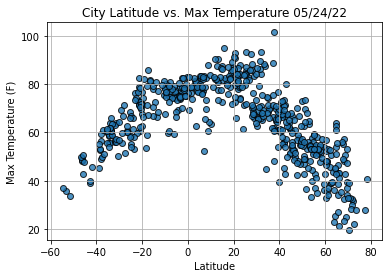

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

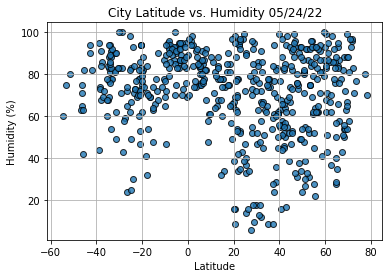

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

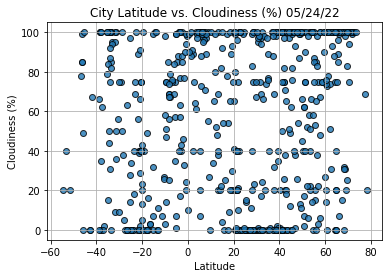

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

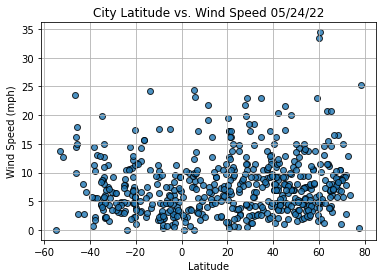

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

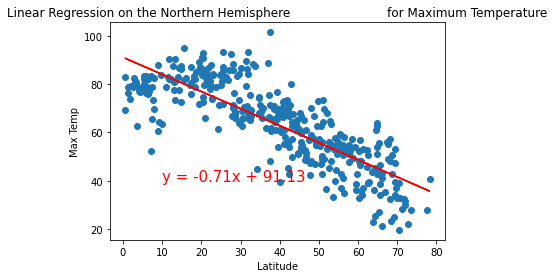

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

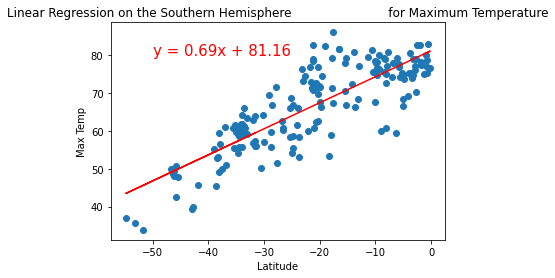

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))




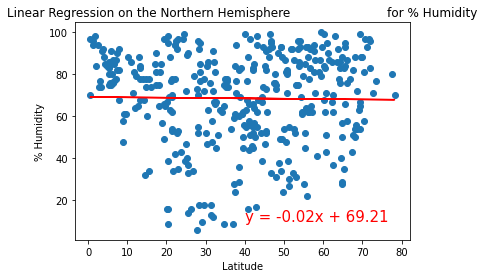

In [50]:
#Linear regression to Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

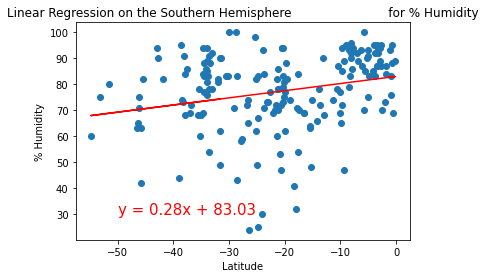

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

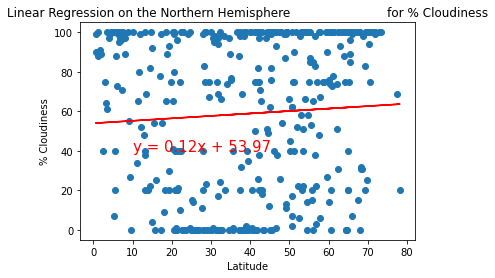

In [63]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

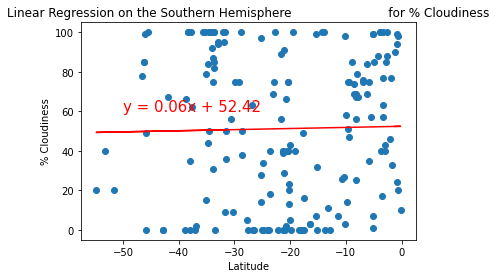

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

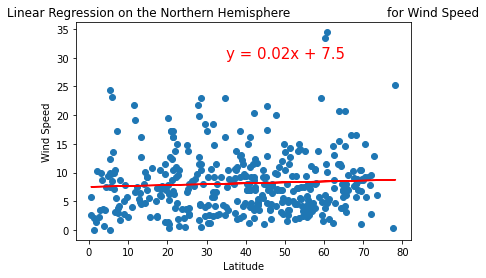

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(35,30))

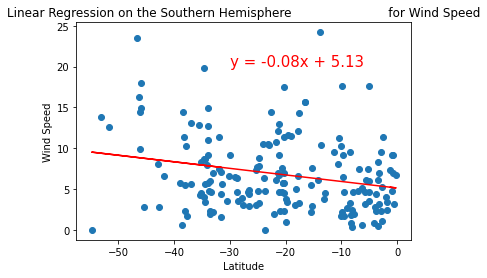

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,20))